# FFT Analysis

In this notebook we will:
1. Generate a simple sine‑wave signal.
2. Visualize it in the time domain.
3. Compute and visualize its frequency spectrum using the Fast Fourier Transform (FFT).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


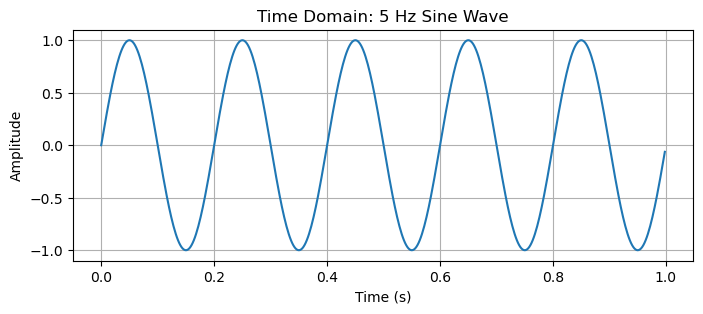

In [ ]:
#Generating a plot and sine wave
# Sampling parameters
fs = 500               # samples per second (Hz)
duration = 1.0         # seconds
t = np.linspace(0, duration, int(fs*duration), endpoint=False)

# Signal: a 5 Hz sine wave
freq = 5               # Hz
signal = np.sin(2 * np.pi * freq * t)

# Plot time‑domain signal
plt.figure(figsize=(8, 3))
plt.plot(t, signal)
plt.title("Time Domain: 5 Hz Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


fs = sampling rate

t = time vector

signal = sine wave at 5 Hz

<Figure size 800x300 with 0 Axes>

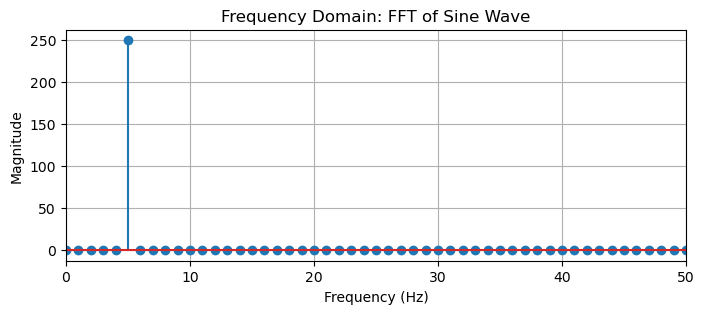

In [9]:
#computing and plotting FFT
# Compute FFT
fft_vals = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(fft_vals), 1/fs)

# Only take the positive half of the spectrum
pos_mask = fft_freqs >= 0
fft_freqs = fft_freqs[pos_mask]
fft_power = np.abs(fft_vals[pos_mask])

# Plot frequency‑domain spectrum
plt.figure(figsize=(8, 3))
plt.stem(fft_freqs, fft_power)
plt.title("Frequency Domain: FFT of Sine Wave")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 50)  # zoom into 0–50 Hz
plt.grid(True)
plt.show()


## What Did We See?

- In the **time‑domain** we saw a smooth oscillation at 5 Hz.
- In the **frequency‑domain** (FFT) we see a single spike at 5 Hz, which confirms the signal’s frequency.

This is the power of FFT: it breaks a waveform into its constituent frequencies, just like taking a chord on a piano and identifying each note.


### Adding Noise to the Signal and Analyze with FFT
To simulate a more realistic signal by adding Gaussian noise to the original sine wave. 
Will compare the time-domain signal and its frequency-domain spectrum to observe how noise impacts our data.


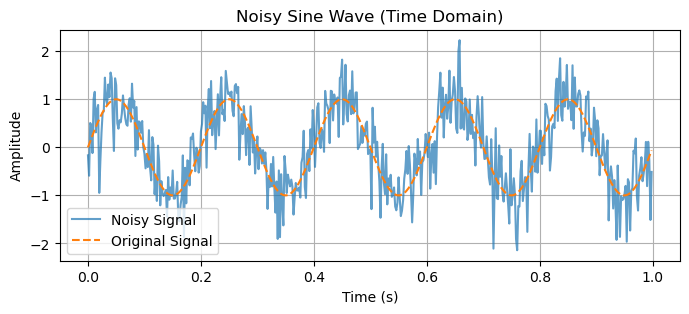

In [16]:
# Add Gaussian noise
noise = np.random.normal(0, 0.5, size=signal.shape)
noisy_signal = signal + noise

# Plot the noisy signal in time domain
plt.figure(figsize=(8, 3))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.plot(t, signal, label='Original Signal', linestyle='--')
plt.title("Noisy Sine Wave (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


### Frequency Analysis of Noisy Signal
To compute the FFT of the noisy signal to observe how the noise spreads power across frequencies.


<Figure size 800x300 with 0 Axes>

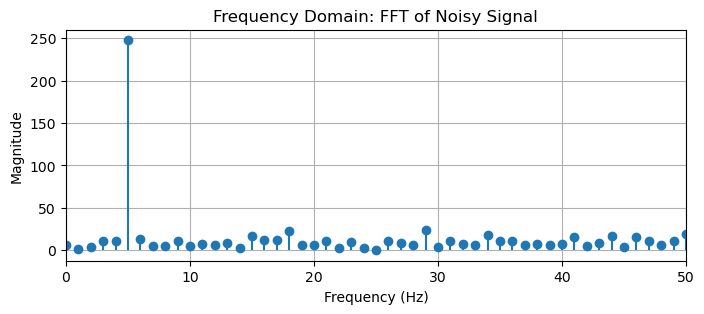

In [21]:
# FFT of the noisy signal
fft_noisy = np.fft.fft(noisy_signal)
fft_freqs = np.fft.fftfreq(len(fft_noisy), 1/fs)

# Only take positive half
pos_mask = fft_freqs >= 0
fft_freqs = fft_freqs[pos_mask]
fft_power = np.abs(fft_noisy[pos_mask])

# Plot frequency spectrum
plt.figure(figsize=(8, 3))
plt.stem(fft_freqs, fft_power, basefmt=" ")
plt.title("Frequency Domain: FFT of Noisy Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 50)
plt.grid(True)
plt.show()


### Applying a Low-Pass Filter to the Noisy Signal
We apply a simple low-pass filter in the frequency domain to clean up the noisy signal.


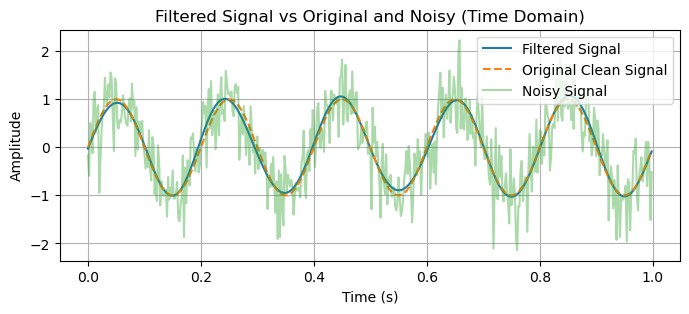

In [24]:
# FFT of the noisy signal again
fft_vals = np.fft.fft(noisy_signal)
fft_freqs = np.fft.fftfreq(len(fft_vals), 1/fs)

# Create low-pass filter mask: keep freqs < 10 Hz
cutoff = 10  # Hz
filter_mask = np.abs(fft_freqs) < cutoff

# Apply mask
filtered_fft = fft_vals * filter_mask

# Inverse FFT to convert back to time domain
filtered_signal = np.fft.ifft(filtered_fft).real

# Plot filtered signal
plt.figure(figsize=(8, 3))
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.plot(t, signal, '--', label='Original Clean Signal')
plt.plot(t, noisy_signal, alpha=0.4, label='Noisy Signal')
plt.title("Filtered Signal vs Original and Noisy (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()
